In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wisc_data = pd.read_csv("wisc_bc_data.csv")

In [3]:
wisc_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [4]:
wisc_data.shape

(569, 32)

In [5]:
wisc_data = wisc_data.iloc[:,1:] # get rid of the id

In [6]:
wisc_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [7]:
wisc_data.shape

(569, 31)

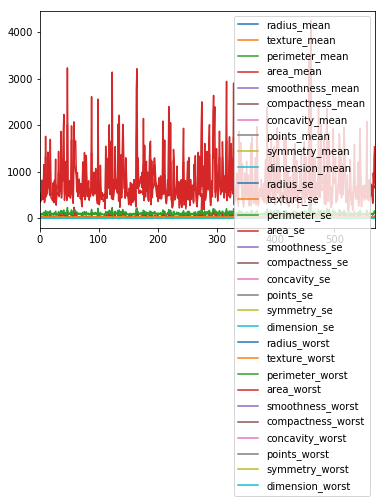

In [8]:
wisc_data.plot()
plt.show()

## Preprocessing - Normalize the Data

In [9]:
wisc_std, wisc_mean = wisc_data.std(), wisc_data.mean()

In [10]:
wisc_mean.head(), wisc_std.head()

(radius_mean         14.127292
 texture_mean        19.289649
 perimeter_mean      91.969033
 area_mean          654.889104
 smoothness_mean      0.096360
 dtype: float64, radius_mean          3.524049
 texture_mean         4.301036
 perimeter_mean      24.298981
 area_mean          351.914129
 smoothness_mean      0.014064
 dtype: float64)

In [11]:
wisc_data.shape, wisc_mean.shape

((569, 31), (30,))

the columns of data and the shape of mean differ since the data has the 'diagnosis' labels.

In [12]:
wisc_data.iloc[:,1:].head() # data without labels

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [13]:
wisc_normalized = (wisc_data.iloc[:,1:] - wisc_mean) / wisc_std

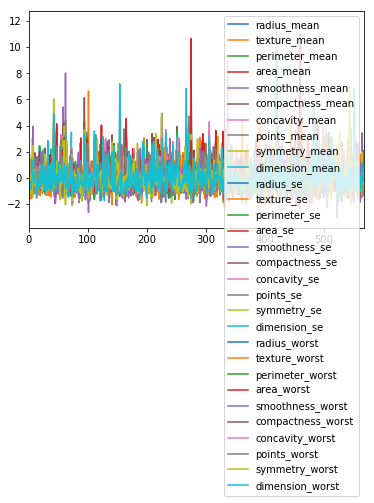

In [14]:
wisc_normalized.plot()
plt.show()

## Preparing the labels and training/validation/testing datasets

In [40]:
labels = wisc_data.iloc[:,0]

In [41]:
labels.tail()

564    B
565    B
566    M
567    B
568    M
Name: diagnosis, dtype: object

In [42]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for col in range(1,2):
        uniq_label=list(labels)
        #print(uniq_label)
        le_fitted = le.fit(uniq_label)
        labels = le.transform(list(labels))
        
labels = pd.DataFrame(labels)

In [43]:
labels.tail()

,0
564,0
565,0
566,1
567,0
568,1


#### Initially, taking the training data as 80% and testing data as the remaining 20% of the entire data

In [227]:
wisc_data = wisc_data.iloc[:,1:]
n = wisc_data.shape[0]
n_train = 469
#int(0.8*n)

In [228]:
wisc_data_train = wisc_data[:n_train]
labels_train = labels[:n_train]
wisc_data_train.shape, labels_train.shape

((469, 28), (469, 1))

In [229]:
wisc_data_test = wisc_data[n_train:]
labels_test = labels[n_train:]
wisc_data_test.shape, labels_test.shape

((100, 28), (100, 1))

In [230]:
labels_test, labels_train

(     0
 469  0
 470  0
 471  0
 472  0
 473  1
 474  0
 475  1
 476  0
 477  1
 478  0
 479  1
 480  0
 481  1
 482  1
 483  0
 484  0
 485  1
 486  0
 487  1
 488  0
 489  1
 490  1
 491  1
 492  1
 493  0
 494  0
 495  0
 496  0
 497  1
 498  1
 ..  ..
 539  0
 540  1
 541  0
 542  0
 543  1
 544  1
 545  0
 546  0
 547  0
 548  0
 549  0
 550  0
 551  0
 552  1
 553  0
 554  0
 555  1
 556  0
 557  0
 558  0
 559  0
 560  1
 561  0
 562  0
 563  0
 564  0
 565  0
 566  1
 567  0
 568  1
 
 [100 rows x 1 columns],      0
 0    0
 1    0
 2    0
 3    0
 4    0
 5    0
 6    0
 7    1
 8    0
 9    0
 10   1
 11   0
 12   0
 13   0
 14   1
 15   0
 16   0
 17   0
 18   1
 19   0
 20   0
 21   0
 22   0
 23   0
 24   0
 25   1
 26   0
 27   1
 28   0
 29   0
 ..  ..
 439  0
 440  0
 441  0
 442  1
 443  0
 444  1
 445  0
 446  0
 447  0
 448  0
 449  1
 450  0
 451  1
 452  1
 453  0
 454  0
 455  0
 456  0
 457  1
 458  0
 459  0
 460  1
 461  1
 462  0
 463  0
 464  1
 465  0
 466  

## Sklearn KNN

In [421]:
from sklearn.neighbors import KNeighborsClassifier
# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
neigh = KNeighborsClassifier(n_neighbors=4,weights='distance',algorithm='brute',p=2)

In [422]:
neigh.fit(wisc_data_train,labels_train)

/home/krohak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance')

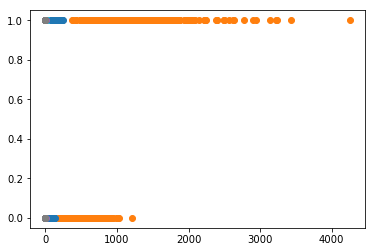

In [423]:
plt.plot(wisc_data_train,labels_train,"o")
plt.show()

In [424]:
y = neigh.predict(wisc_data_test)

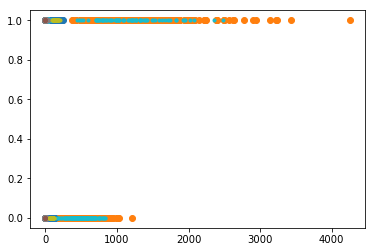

In [425]:
plt.plot(wisc_data_train,labels_train, "o")
plt.plot(wisc_data_test,y,".")
plt.show()

In [426]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y , labels_test)*100)

97.0
